<img src="skidmark_small.bmp" alt="skidmark" align="right" height="19%" width="19%">
<center>
<h2><span style="color:black;">Using Telematic Data to Identify Increased Liability Drivers</span></h2><br>
<br>
<b>Team Name:</b><br>
<br>
SkidMarks<br>
<br>
<br>
<b>Team Members:</b><br>
<br>
<a href="https://www.linkedin.com/pub/linwood-creekmore-iii/38/745/a21">Linwood Creekmore</a><br>
<a href="https://www.linkedin.com/pub/vikram-mittal/10/ba7/a81">Vikram Mittal</a><br>
<br>
<br>
_In partial fulfillment of the requirements for Georgetown University's Data Science Professional Certificate Program_<br>
<br>
April 2015
</center>

<h3><a name="Contents">Table of Contents</a></h3>

<h4>
<a href="#Abstract">Abstract</a><br><br>
<a href="#PixarPitch">Pixar Pitch</a><br><br>
<a href="#Introduction">Introduction</a><br><br>
<a href="#Data">Data</a><br><br>
<a href="#Issues">Issues</a><br><br>
<a href="#Methodology">Methodology</a><br><br>
<a href="#Discussion">Discussion</a><br><br>
<a href="#Challenges">Challenges</a><br><br>
<a href="#LessonsLearned">Lessons Learned</a><br><br>
<a href="#WinningTeam">Winning Team</a><br><br>
<a href="#FurtherResearch">Further Research</a><br><br>
<a href="#Conclusion">Conclusion</a><br><br>
<a href="#References">References</a><br><br>
<a href="#Appendices">Appendices</a><br><br>
</h4>

In [7]:
from IPython.display import display
from IPython.display import Image

><center>iPython formatting guidance</center> 
><center>http://nbviewer.ipython.org/github/NelisW/ComputationalRadiometry/blob/master/01-IPythonHintsAndTips.ipynb</center>
><center> For those viewing this Notebook as a webpage, this service is provided by nbviewer:
><center>http://nbviewer.ipython.org/</center>
><center>Markdown Formatting Cheat Sheet</center>
><center>http://assemble.io/docs/Cheatsheet-Markdown.html</center>


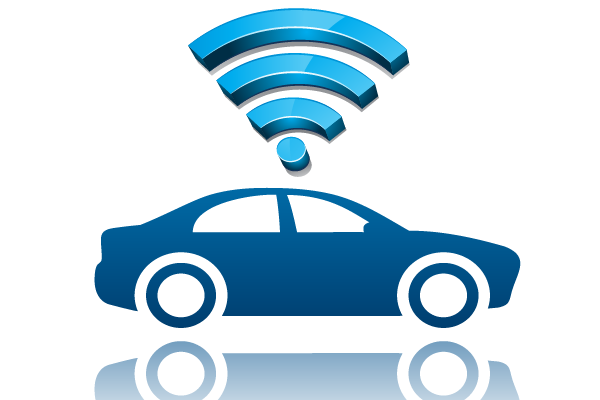

In [8]:
picUrl = 'http://software.quest-global.com/wp-content/uploads/2014/11/connectedcar-logo.png'
Embed  = Image(picUrl)
display(Embed)

<h3><a name="Abstract">Abstract</a></h3>

We perform and outline the steps taken to create a model to classify driver behavior based telematic data provided by AXA. Then, a prediction model is described to determine if a driver is likely to be a safe or unsafe driver based on a single trip.

<h3><a name="Introduction">Introduction</a></h3>

Quantitative risk management has been a cornerstone of the auto insurance industry for many years.  Traditionally, companies in the industry calculate risk-based premiums using driver history, demographics, geographic factors, and vehicle characteristics.  Driver history includes events such as accidents, moving violations, and license suspensions.  Demographic factors include age, gender, marital status, and occupation.  Geographic factors include traffic and weather patterns, as well as crime rates such as vandalism and theft.  Finally, vehicle characteristics include make, model, year, and mileage to derive a current value.  Insurance companies combine these various factors into an expected loss model to predict the probability of a claim and the size of a claim in the future.  While insurance providers clearly rely on a wealth of information to make pricing decisions, the data still has its limitations.  For example, driver history factors describe relatively infrequent, negative events.  Additionally, insurance companies typically only have access to three to five years of driver history data per state laws.  Progressive, a U.S. industry leader in data-driven policy making, found that key driving behaviors—like actual miles driven, braking, and time of day of driving—carry more than twice the predictive power of traditional insurance rating variables like those just described.  Furthermore, a white paper by Deloitte highlighted the mutually beneficial motivations behind this driving-data-craze in a 2012 white paper:

>"...the advantages accrue to virtually all sides. Insurance companies benefit from matching premiums more closely >with actual risk. Drivers benefit from the opportunity to lower their insurance rates by driving less or more >safely..."

Knowing that “more data often beats better models”, insurance companies are now looking to incorporate daily driving behavior into their premium pricing models to gain a competitive advantage.  You may be familiar with Progressive’s Snapshot commercials where customers choose to place a device in their vehicles that monitors the vehicle’s position and speed.  The idea is to reward customers with good driving habits by offering them discounted premiums.  With this information, Progressive can also identify customers with risky driving habits and then initiate a variety of mitigation options such as offering corrective guidance, increasing premiums, or even terminating coverage.  With the prevalence of GPS devices in vehicles, either as a standalone unit or built into a driver’s cell phone, insurance companies now have access to real-time driver behavior to allow for more accurate predictions of claims and expected losses than ever before.  Like Progressive Insurance, AXA Insurance is moving in the direction of capturing current driver data and has sponsored a Kaggle competition to obtain a top performing classification and prediction model.  The purpose of this paper is to outline the steps taken to create a model to classify driver behavior based telematic data provided by AXA.  Then, a prediction model is described to determine if a driver is likely to be a safe or unsafe driver based on a single trip.


<h3><a name="Pixar Pitch">The Pixar Pitch</a></h3>


### Once upon a time
…auto insurance companies charged premiums based on accidents and moving violations. 
#### Every Day 
…drivers were being penalized for these infrequent, negative events.
##### One Day
...a company decided to capture the daily driving habits of its customers in its premium pricing model.
###### Because of that
…customers with good driving habits felt happier after being rewarded with lower premiums.
####### Because of that
…the insurance company experienced less customer turnover and more new customers applied for policies.
######## Until finally 
...the insurance company had captured greater market share.


### <span style="color:clue;">Insurance companies WANT your data!!!</span>

AXA, the French multinational investment banking and insurance management firm, sponsored a Kaggle competition and provided a clean data file for each of 200 trips for 3,600+ drivers. Each file contained a list of anonymized vehicle positions at every second of the trip (i.e. each row represents the vehicle’s 2-dimensional position after one second). To protect the identity and location of the drivers, longitude and latitude coordinates are not provided so this data set cannot be matched up with coordinates of major roadways to determine speed limits, road signs, and traffic lights.


In [9]:
driver = raw_input("Enter a number between 1-3612:\n>")

Enter a number between 1-3612:
>1


In [10]:
trip = raw_input("Enter a number between 1-200:\n>")

Enter a number between 1-200:
>33


       x     y
0    0.0   0.0
1    0.0   3.1
2   -0.2   5.9
3   -2.6   8.9
4   -4.2  11.2
5   -6.7  13.9
6   -9.2  16.9
7  -13.7  21.0
8  -17.1  24.8
9  -20.5  28.5
10 -24.1  31.8
11 -25.9  33.4
12 -27.8  34.6
13 -28.9  35.0
14 -31.0  35.6


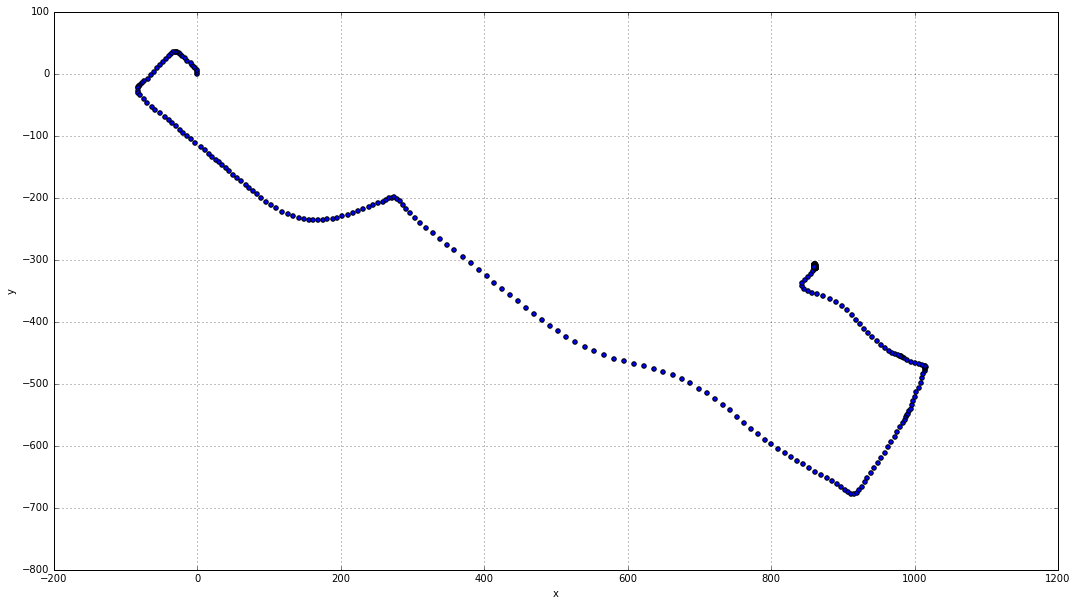

In [11]:
import pandas as pd
import os
%matplotlib inline
import matplotlib.pyplot as plt

path = os.path.abspath(os.getcwd())
pathtocsv = os.path.normpath(os.path.join(os.path.dirname(path),"input","test",str(driver),str(trip)+".csv"))
df = pd.read_csv(pathtocsv)
print df[:15][['x','y']]

df.plot(kind = 'scatter', x = 'x', y = 'y', figsize=(18,10))
plt.show()

In [12]:
import math

# Calculate the direction
def getDirection(y,x):
    direction_rad = math.atan2(y,x)
    direction = math.degrees(direction_rad) 
    if direction < 0:
        direction += 360
    return direction 

def getCardinalDirection(direction):
    carddir = ''
    if direction >= 0 and direction <= 22.5:
        carddir = 'East'
    elif direction > 337.5 and direction <=360:
        carddir = 'East' 
    elif direction > 22.5 and direction <= 67.5:
        carddir = 'Northeast'
    elif direction > 67.5 and direction <= 112.5:
        carddir = 'North'
    elif direction > 112.5 and direction <= 157.5:
        carddir  = 'Northwest'
    elif direction > 157.5 and direction <= 202.5:
        carddir  = 'West'
    elif direction > 202.5 and direction <= 247.5:
        carddir = 'Southwest'
    elif direction > 247.5 and direction <= 292.5:
        carddir  = 'South'
    elif direction > 292.5 and direction <= 337.5:
        carddir  = 'Southeast'

    return carddir

print "The cardinal direction is %r and the direction in degrees is %r" %(getCardinalDirection(getDirection(11.2,-4.2)), getDirection(11.2,-4.2))

val = pd.rolling_sum(df, window = 3)
print val[2:10]



The cardinal direction is 'North' and the direction in degrees is 110.55604521958348
      x     y
2  -0.2   9.0
3  -2.8  17.9
4  -7.0  26.0
5 -13.5  34.0
6 -20.1  42.0
7 -29.6  51.8
8 -40.0  62.7
9 -51.3  74.3


<h3><a name="Methodology">Methodology and Tools</a></h3>

<b><i>Data Ingestion</i></b>. The original AXA data set was downloaded/warehoused as a zipped CSV file from the competition website.  The original file was stored in as raw a form as possible; each driver (total of 3612) had a directory with two-hundred (200) trips.  Each trip had an x and y column value for each REPORTED second of the trip.  Outside of the standard browser provided download tools and local operating system directories, no special tools were used for the ingestion phase of the Data Science Pipeline.   There was some experimentation with wget. Team SkidMarks initially planned to use to Postgres  as the Write Once Read Many (WORM) repository but scheduling, learning curves, and feature calculations (discussed later) consumed the bulk of the project time. Local folders on teammate computers served as the ingestion landing zone.  

<i><b>Data Munging and Wrangling</i></b>. Using team-created python scripts, the data was normalized and replicated (added concatenated primary key with creation of trip_id and driver_id columns) to intuitively capture relationships within the data.  The os Python module was used for operating system interoperability and the csv Python module was used to read and write the normalized database structure to another directory for computation and analysis. 

In [13]:
path = os.path.abspath(os.getcwd())
pathtocsv = os.path.normpath(os.path.join(os.path.dirname(path),"output","test",str(driver), str(driver) + "_" +str(trip)+".csv"))
normed_df = pd.read_csv(pathtocsv)
print pathtocsv
print normed_df[:15][[0,1,2,3]]


/Users/linwoodc3/projects/skidmarks/bin/output/test/1/1_33.csv
    driver_id  trip_id     x     y
0           1       33   0.0   0.0
1           1       33   0.0   3.1
2           1       33  -0.2   5.9
3           1       33  -2.6   8.9
4           1       33  -4.2  11.2
5           1       33  -6.7  13.9
6           1       33  -9.2  16.9
7           1       33 -13.7  21.0
8           1       33 -17.1  24.8
9           1       33 -20.5  28.5
10          1       33 -24.1  31.8
11          1       33 -25.9  33.4
12          1       33 -27.8  34.6
13          1       33 -28.9  35.0
14          1       33 -31.0  35.6


<i><b>Computation and Analyses</i></b>. Naturally, this step consumed the bulk of the CAPSTONE project’s time and resources; feature creation was a coding, memory, and research intensive process.  The python Pandas library was used because it provides high-performance, easy-to-use data structures and data analysis tools within Python.  From simple x and y positional data, Team SkidMarks  used the pandas library to compute over 18 telematic and trip matching features:

* Velocity

* Average Velocity

* Standard Deviation

* Maximum

* Acceleration

* Average

* Standard Deviation

* Maximum

* Distance

* Increment traveled per second

* Total distance traveled (sum of all increments)

* Total displacement

* Heading

* Heading standard deviation

* Heading in degrees

* Heading as a cardinal direction

* Maximum 1-second change in heading  for trip

* Turns

*  count of maneuvers greater than 45 degree change in direction over 3 second rolling window

* Turn plus speed over 30 mph (aggressive turns)

* Braking

* Deceleration events lasting 3 seconds (braking)

* Large deceleration events

* Maximum deceleration events

* Consecutive zero acceleration/velocity/increment travels events 

* Time

* Total REPORTED trip time

Base features were computed on a trip/per second basis.  Next, aggregate trip values, such as the average velocity over the duration of the trip, were computed for all driver files in the data store.    

Despite several value/rule-based filters, Team SkidMarks did not completely remove outlier data.  “Hyperspace jumps” still remain as outliers in the data set because of  periods where travelers covered large distances in short times because of GPS signal loss.  However, existing filtering removed the bulk of the erroneous data.

In [14]:
df2 = pd.read_csv(os.path.normpath(os.path.join(os.path.dirname(path),'lin.csv')))
print df2[:10]

   driver_id  trip_id  Average Velocity (mph)  Max Velocity  Velocity Stdev  \
0         10        1               22.025986     51.479567       16.089867   
1         10       10               25.933013     47.370042       13.689941   
2         10      100               13.319320     31.070665       10.550685   
3         10      101               16.599385     41.563319       13.933061   
4         10      102               16.182505     39.469792       10.719522   
5         10      103               23.693349     53.782862       15.955094   
6         10      104               12.387942     38.070116       14.592944   
7         10      105                8.221839     20.899332        6.665026   
8         10      106               19.598540     51.268115       16.371993   
9         10      107               15.625060     49.971584       14.645314   

   Average Acceleration (mph per s)  Max Acceleration (mph per s)  \
0                          1.181900                      6.45

<b><i>Modeling and Application</i></b>. Determining safe vs unsafe drivers is an unsupervised learning task.  Clustering with K-Means provides the best machine learning option to explore the dataset and will also help discover hidden structure or patterns in unlabeled training data.   The goal is to use cluster analysis to take a group of observed trips by drivers so that drivers with similar telematic and/or trip matching features such that members of the same group or cluster are more similar to each other by a given metric than they are to members of other clusters.  Team SkidMarks used the KMeans Clustering module within Python’s SciKit-Learn Machine Learning library.  The pandas, numpy, and Scipy  libraries were used with SciKit-Learn to ingest/preprocess/load data.

The Silhouette Coefficient was used as a performance measure for the clusters.  The silhouette coefficient is a measure of the compactness and separation of the clusters.  The best value is 1 and the worst value is -1.

KMeans clustered on train data, and a function, that, given train data, returned an array of integer labels corresponding to the different clusters.  Team SkidMarks experimented with using the learned features to build a supervised classifier, making this CAPSTONE a semi supervised learning problem in the end. 

<b><i>Reporting and Visualization</i></b>. Results were presented as visualizations using the matplotlib Python library.  A scatter matrix was initially used to explore the potential relationships between the calculated features.  Next, cluster visualizations were created to show the decision space and cluster groupings calculated via the KMeans clustering algorithm.  And finally, a simple fitted line plot was used to show the fitted classifier data. 

In [15]:
df2 = pd.read_csv(os.path.normpath(os.path.join(os.path.dirname(path),'lin.csv')))
df2.describe()

driver_id      trip_id  Average Velocity (mph)  Max Velocity  \
count  4600.000000  4600.000000             4600.000000   4600.000000   
mean     17.260870   100.500000               17.143772     43.930266   
std       8.050814    57.740582                9.736226     18.339800   
min       1.000000     1.000000                0.026113      0.448000   
25%      12.000000    50.750000               10.241975     33.437581   
50%      18.000000   100.500000               15.437727     40.985879   
75%      24.000000   150.250000               23.640534     52.106487   
max      30.000000   200.000000               63.739891    147.699424   

       Velocity Stdev  Average Acceleration (mph per s)  \
count     4600.000000                       4600.000000   
mean        12.679038                          1.193506   
std          4.668269                          0.458221   
min          0.087896                          0.052225   
25%         10.065898                          0.954951   
50%         12.274847                          1.154427   
75%         15.325039                          1.405204   
max         31.679671                         14.662127   

       Max Acceleration (mph per s)   Acceleration Stdev  Displacement  \
count                   4600.000000          4600.000000   4600.000000   
mean                      14.586791             2.052010   3294.765953   
std                       14.345964             0.891752   3921.873153   
min                        0.448000             0.125665      0.223607   
25%                        7.254335             1.572558    754.676534   
50%                       10.345544             1.924528   1704.342617   
75%                       16.314069             2.363690   4477.182222   
max                      140.534184            19.665523  28904.697758   

       Total Distance Traveled  Max Direction Change per sec  \
count              4600.000000                   4600.000000   
mean               5237.066675                     65.329313   
std                5195.860836                     34.442457   
min                   2.809902                      0.000000   
25%                1710.073160                     45.000000   
50%                3478.840137                     49.516026   
75%                6951.420384                     73.293805   
max               40731.752107                    180.000000   

        Direction Stdev     Time (s)        Turns  Aggressive Turns  \
count       4600.000000  4600.000000  4570.000000       3679.000000   
mean         103.359228   636.169783    14.979869          3.324817   
std           22.782350   397.501378    10.725490          2.910428   
min           14.581429   150.000000     1.000000          1.000000   
25%           87.375657   322.000000     8.000000          1.000000   
50%          105.238781   518.000000    12.000000          2.000000   
75%          119.716872   854.000000    19.000000          4.000000   
max          158.809584  1785.000000    73.000000         26.000000   

             Stops  Large Deceleration Events  Deceleration Events  \
count  4569.000000                4600.000000          4600.000000   
mean      5.891223                   1.112174             7.244130   
std       5.309694                   1.611826             5.934242   
min       1.000000                   0.000000             0.000000   
25%       2.000000                   0.000000             3.000000   
50%       4.000000                   1.000000             6.000000   
75%       8.000000                   1.000000            10.000000   
max      54.000000                  14.000000            43.000000   

       Max Deceleration Event  
count             4600.000000  
mean               -11.295638  
std                  7.182614  
min                -39.982664  
25%                -13.774150  
50%                 -8.944974  
75%                 -6.320108  
max                 -0.316784

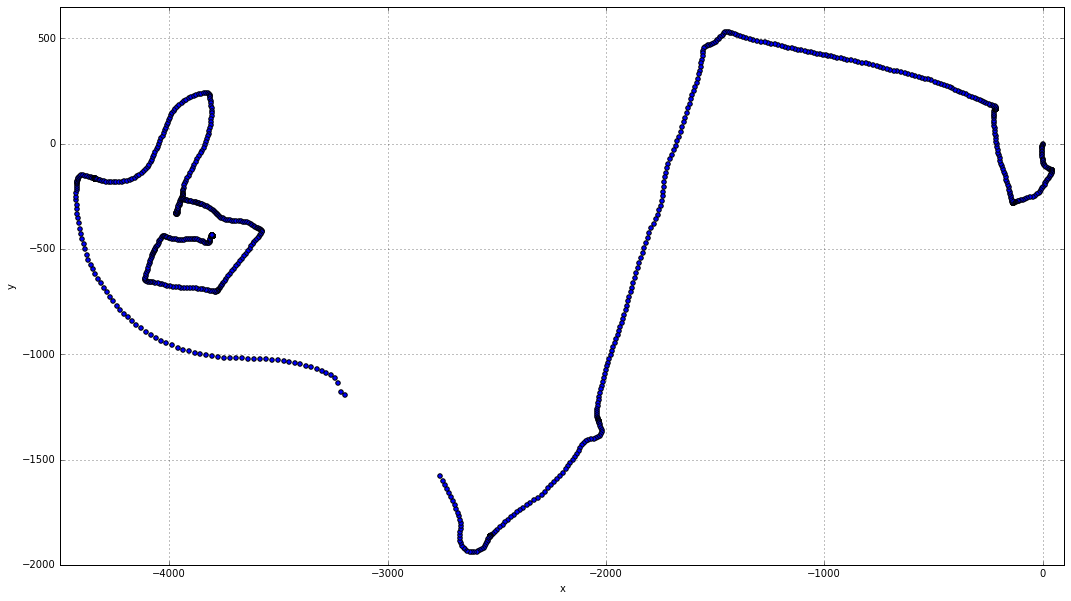

In [16]:
path = os.path.abspath(os.getcwd())
pathtocsv = os.path.normpath(os.path.join(os.path.dirname(path),"input","test","1","200" +".csv"))
df = pd.read_csv(pathtocsv)
df.plot(kind = 'scatter', x = 'x', y = 'y', figsize=(18,10))
plt.ylim(-2000,650)
plt.xlim(-4500,100)
plt.show()



In [17]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt


def DisPlt(driver,trip):

	path = os.path.abspath(os.getcwd())
	pathtocsv = os.path.normpath(os.path.join(os.path.dirname(path),"output","trip",str(driver)+"_"+str(trip)+".csv"))
	df = pd.read_csv(pathtocsv)

	investigation = str(raw_input("Enter a variable \n>"))

	h = sorted([df[investigation]]) #sorted




	fit = stats.norm.pdf(h, np.mean(h), np.std(h))  #this is a fitting indeed

	plt.plot(h,fit,'-o')

	plt.hist(h,normed=True)      #use this to draw histogram of your data

	plt.show()                   #use may also need add this

###############################################################################
# 'Main' Function
############################################################################### 


DisPlt(1,1)

Enter a variable 
>Turns


KeyError: 'Turns'

The scatter matrix is a visualizaiton that helps to explore the "character" of the data; some of the feature comparisons may suggest potential correlations or relationships.

In [ ]:
import matplotlib.pyplot as plt
from pandas.tools.plotting import scatter_matrix
from matplotlib.ticker import MultipleLocator, FormatStrFormatter

scatter_matrix(df2,alpha=0.5, figsize=(15,15),diagonal='kde')

plt.show()

The first goal is to group a set of drivers into the same group (called a cluster), where drivers within the group are more similar (in some sense or another) to each other than to those in other groups (clusters). The KMeans was used because the algorithm scales well to large data sets and is one of the easier algorithms to implement and return classes.  The initial clustering follows:  

In [ ]:
from time import time
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.preprocessing import Imputer

# Some colors for later
colors = np.array([x for x in 'bgrcmykbgrcmykbgrcmykbgrcmyk'])
colors = np.hstack([colors] * 20)
  
###
 #Initial data load from the aggregate file csv
with open(os.path.normpath(os.path.join(os.path.dirname(path),'lin.csv'))) as in_data:
    skid_data = pd.DataFrame.from_csv(in_data, sep=',')

print list(enumerate(skid_data.columns))

#Loading into the numpy array

as_array = np.asfarray(skid_data[['Average Velocity (mph)','Max Velocity', 'Velocity Stdev','Average Acceleration (mph per s)', 'Max Acceleration (mph per s)', ' Acceleration Stdev','Displacement','Total Distance Traveled','Max Direction Change per sec', ' Direction Stdev','Time (s)', 'Turns', 'Aggressive Turns', 'Stops', 'Large Deceleration Events', 'Deceleration Events', 'Max Deceleration Event']])


print skid_data.shape

#number of groups
n_clusters=4

# preprocessing tricks
imputer = Imputer(missing_values="NaN", strategy="mean")
patched = imputer.fit_transform(as_array)
patched = StandardScaler().fit_transform(patched)
#patched = scale(patched, axis=0, with_mean=True)

print patched



#cluster data 
cluster = KMeans(n_clusters=n_clusters)
cluster.fit(patched)

#assigned grouped labels to the skid data
labels = cluster.labels_
skid_data["labels"]=labels

#pdict = create_ordered_dict(crime_data, "labels")
'''
# Fit the model with our algorithm
cluster = MiniBatchKMeans(n_clusters=3)
cluster.fit(as)
'''
# Make Predictions
predictions = cluster.predict(patched)



# Plotting the clusters



plt.scatter(patched[:, 0], patched[:, 5], color=colors[predictions].tolist(), s=5)
centers = cluster.cluster_centers_
center_colors = colors[:len(centers)]
plt.scatter(centers[:, 0], centers[:, 5], s=169, c=center_colors,marker='x', linewidths=3,
            color='white', zorder=10)
plt.title('K-means clustering on Average Acceleration and the number of \ncalculated turns in a trip'
          'Centroids are marked with blue cross')
plt.xticks(())
plt.yticks(())
plt.ylabel('$Feature A$')
plt.xlabel('$Feature B$')
plt.figure(num=1, figsize=(18, 18), dpi=80, facecolor='w', edgecolor='k')

plt.show()


classified_data = cluster.labels_
skid_data = skid_data.copy()
print pd.Series(classified_data).mode()
skid_data['Cluster Class'] = pd.Series(classified_data, index=skid_data.index)
print "This is what all of my work was for, this one little array.\n", classified_data

## A test on our clusters

In [ ]:
from __future__ import print_function

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
from sklearn.preprocessing import Imputer
from sklearn import preprocessing


with open(os.path.normpath(os.path.join(os.path.dirname(path),'lin.csv'))) as in_data:
    skid_data = pd.DataFrame.from_csv(in_data, sep=',')

X = np.asfarray(skid_data[['Average Velocity (mph)','Turns','Max Velocity', 'Velocity Stdev','Average Acceleration (mph per s)', 'Max Acceleration (mph per s)', ' Acceleration Stdev','Displacement','Total Distance Traveled','Max Direction Change per sec', ' Direction Stdev','Time (s)', 'Turns', 'Aggressive Turns', 'Stops', 'Large Deceleration Events', 'Deceleration Events', 'Max Deceleration Event']])


# Preprocessing tricks

imputer = Imputer(missing_values="NaN", strategy="mean")
X = imputer.fit_transform(X)


range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for Telematic Data
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Clustered Drivers")

    # The vertical line for average silhoutte score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors)

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1],
                marker='o', c="white", alpha=1, s=200)

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50)

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    plt.show()

In [ ]:
from time import time
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
import os
from sklearn import metrics
from sklearn.metrics import pairwise_distances
from sklearn.metrics.cluster import v_measure_score


path = path = os.path.abspath(os.getcwd())

# Some colors for later
colors = np.array([x for x in 'bgrcmykbgrcmykbgrcmykbgrcmyk'])
colors = np.hstack([colors] * 20)

###
 #load data from a CSV to a dataframe
with open(os.path.normpath(os.path.join(os.path.dirname(path),'lin.csv'))) as in_data:
    skid_data = pd.DataFrame.from_csv(in_data, sep=',')

n_samples, n_features = skid_data.shape
print skid_data.shape

#skid_data=skid_data.fillna(value=-999)

#load all numeric data into an array. The offense column from the crime data
#is excluded
as_array = np.asfarray(skid_data[['Average Velocity (mph)','Max Velocity', 'Velocity Stdev','Average Acceleration (mph per s)', 'Max Acceleration (mph per s)', ' Acceleration Stdev','Displacement','Total Distance Traveled','Max Direction Change per sec', ' Direction Stdev','Time (s)', 'Turns', 'Aggressive Turns', 'Stops', 'Large Deceleration Events', 'Deceleration Events', 'Max Deceleration Event']])

#number of groups
n_clusters=4


#Correct missing data 
imputer = Imputer(missing_values="NaN", strategy="mean")
patched = imputer.fit_transform(as_array)

# Preprocessing tricks
patched = StandardScaler().fit_transform(patched)
#patched = scale(patched, axis=0, with_mean=True)

#patched = preprocessing.normalize(patched, norm='l2')

#min_max_scaler = preprocessing.MinMaxScaler()
#patched = min_max_scaler.fit_transform(patched)




#cluster data 
cluster = KMeans(n_clusters=n_clusters)
cluster.fit(patched)



# assigned grouped labels to the Skid data
#labels = cluster.labels_
#skid_data["labels"]=labels
'''
# Fit the model with our algorithm
cluster = MiniBatchKMeans(n_clusters=3)
cluster.fit(patched)
'''
reduced_data = PCA(n_components=2).fit_transform(patched)


kmeans = KMeans(init='k-means++', n_clusters=n_clusters, n_init=20)
fit = kmeans.fit(reduced_data)
predict = kmeans.predict(reduced_data)

# Make Predictions
labels = cluster.predict(patched)



# array of indexes corresponding to classes around centroids, in the order of your dataset
classified_data = kmeans.labels_
prediction_data = labels

#copy dataframe (may be memory intensive but just for illustration)
skid_data = skid_data.copy()
#print pd.Series(classified_data)
#print pd.Series(prediction_data)
skid_data['Predicted Class'] = pd.Series(prediction_data, index=skid_data.index)
#print skid_data.describe()
print cluster.labels_
#print list(skid_data.columns)
skid_data.plot( x = 'Average Acceleration (mph per s)', y = 'Predicted Class', kind = 'scatter')
plt.show()


# Scoring to evaluate cluster performance

# Silhouette Coefficient
print "We want scores close to 1 \n"

SilouetteCoefficient = metrics.silhouette_score(patched, classified_data, metric='euclidean')
'''

AdjustRandIndex = metrics.adjusted_rand_score(classified_data, prediction_data)
MutualInfoScore = metrics.adjusted_mutual_info_score(classified_data,prediction_data)
HomogenietyScore = metrics.homogeneity_score(classified_data, prediction_data) 
CompletenessScore = metrics.completeness_score(classified_data, prediction_data)
V_measure = metrics.v_measure_score(classified_data, prediction_data) 
'''


'\nThe Adjusted Rand index is %r\nThe Mutual Information based score is %r\nThe Homogeneity score is %r\nThe completeness score is %r\nThe V-measure score is %r" % (SilouetteCoefficient,AdjustRandIndex,MutualInfoScore,HomogenietyScore,CompletenessScore,V_measure)'
print "The Silouette Coefficient score is %r...\n", SilouetteCoefficient

#############
#scikit-learn visualization example

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = .02     # point in the mesh [x_min, m_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() + 1, reduced_data[:, 0].max() - 1
y_min, y_max = reduced_data[:, 1].min() + 1, reduced_data[:, 1].max() - 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('K-means clustering on the snippet of Team Skidmarks dataset \n(PCA-reduced data)'
          'Centroids are marked with blue cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

As demonstrated in the figure above, the clusters are nearly indistiguishable when we reduce the dimensionality of the features.

<h3><a name="Challenges">Challenges</a></h3>

*“Hyperspace jumps” where the GPS signal was likely lost for a short period of time, causing the data to appear as if the vehicle traveled 1,000 mph for a period of time.
*We later discovered that the vehicle’s heading, i.e. the direction it is traveling, can also change dramatically because of GPS errors.
*To properly adjust for these GPS signal loss issues, smoothing techniques are needed.
*To discourage trip matching, AXA inserted fake trips.  Need a method to programmatically identify and eliminate these trips.


<h3><a name="Discussion">Discussion</a></h3>

- Data wrangling and data munging consume 90% of the time
- Sci-kit learn documentation makes modeling and analysis easier
- since our features are all calculated, our data science pipeline is a little different.  After each feature calculation, we need to revisit data wrangling.

<h3><a name="Conclusion">Conclusion</a></h3>

We have not broken out the key features, but they exist in our feature set based on the Kaggle Competiton Winner's forum posts!

<h3><a name="References">References</a></h3>

a bibliography or works cited

<h3><a name="Appendices">Appendices</a></h3>

any appendices that highlight key parts of your work (code snippets, data snippets, other graphs, etc.)